# Monitor Hamilton with OpenTelemetry, OpenLLMetry and Traceloop


It will showcase how the [OpenTelemetry](https://opentelemetry.io/) plugin for Hamilton can trace node and using [OpenLLMetry](https://github.com/traceloop/openllmetry) allows to automatically trace popular LLM components. This example uses [Traceloop](https://www.traceloop.com/) as a destination for telemetry, but other [open-source options are available](https://opentelemetry.io/ecosystem/vendors/) (Jaeger, Elastic, Clickhouse, Grafana, etc.)

In [1]:
import os
from hamilton import driver
from hamilton.plugins import h_opentelemetry
from traceloop.sdk import Traceloop

%load_ext hamilton.plugins.jupyter_magic

## Define a dataflow
The next cell creates a Python module named `llm_dataflow` and defines a dataflow that creates an OpenAI client and queries the chat completions endpoint to center an HTML `<div>` tag.

You'll notice that nothing special is added to enable tracing

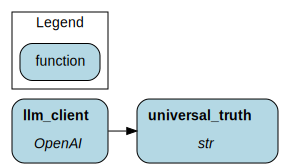

In [2]:
%%cell_to_module llm_dataflow -d
import openai

def llm_client() -> openai.OpenAI:
    return openai.OpenAI()

def universal_truth(llm_client: openai.OpenAI) -> str:
    response = llm_client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": "You are a benevolent all-knowning being"},
            {"role": "user", "content": "Please center my HTML <div> tag"},
        ],
    )
    return str(response.choices[0].message.content)

## Build the dataflow
The Hamilton `Builder` object takes the previously defined dataflow via `.with_modules(llm_dataflow)`. Then, we pass the `OpenTelemetryTracer` object via `.with_adapters()` to trace dataflow execution. Make sure to call `Traceloop.init()` before creating the `OpenTelemetryTracer`.

You'll need to set your `OPENAI_API_KEY` and your `TRACELOOP_API_KEY` to run the cell.

In [3]:
os.environ["OPENAI_API_KEY"] = ...
os.environ["TRACELOOP_API_KEY"] = ...

In [6]:
Traceloop.init()

dr = (
    driver.Builder()
    .with_modules(llm_dataflow)
    .with_adapters(h_opentelemetry.OpenTelemetryTracer())
    .build()
)

# If you wanted to use another OpenTelemetry destination such as the
# open-source Jaeger, setup the container locally and use the following code

# from opentelemetry import trace
# from opentelemetry.sdk.trace import TracerProvider
# from opentelemetry.sdk.trace.export import SimpleSpanProcessor
# from opentelemetry.exporter.jaeger import JaegerExporter

# jaeger_exporter = JaegerExporter(agent_host_name='localhost', agent_port=5775)
# span_processor = SimpleSpanProcessor(jaeger_exporter)
# provider = TracerProvider(active_span_processor=span_processor)
# trace.set_tracer_provider(provider)

results = dr.execute(["universal_truth"])

Traceloop syncing configuration and prompts
Traceloop exporting traces to https://api.traceloop.com authenticating with bearer token



In [5]:
print(results["universal_truth"])

To center an HTML `<div>` element, you can use CSS. There are several methods to achieve this, depending on whether you want to center it horizontally, vertically, or both. Here are a few common methods:

### Centering Horizontally

One of the simplest ways to center a `<div>` horizontally is to set its width, and then use `margin: auto;`. Here's an example:

```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Center Div</title>
    <style>
        .centered-div {
            width: 50%; /* Set a width */
            margin: 0 auto; /* Center horizontally */
            background-color: lightblue; /* Optional: Background color */
            padding: 20px; /* Optional: Padding */
            text-align: center; /* Optional: Center text */
        }
    </style>
</head>
<body>
    <div class="centered-div">
        This div is centered horizontally!
    </div>
</body>
</html>
``